<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


## Data preproccessing

#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
# prompt: ignore warnings of deprecated elements

import warnings
warnings.filterwarnings('ignore')


In [2]:
# vizualization settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
boston_df.drop(boston_df.columns[0], axis=1, inplace=True)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Variable exploration

Median value of owner-occupied homes

Text(0.5, 1.0, 'Median value of owner-occupied homes')

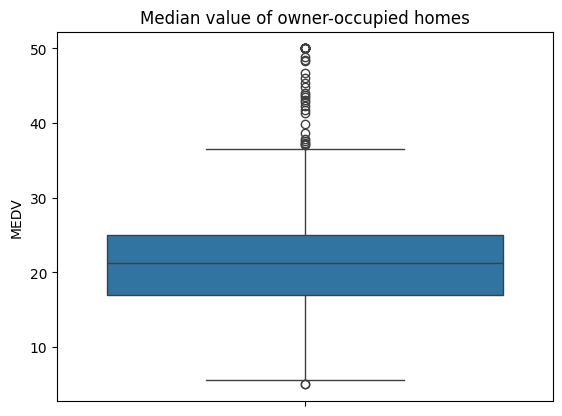

In [6]:
# boxplot para boston_df['MEDV'], con tílulo Median value of owner-occupied homes
sns.boxplot(y=boston_df['MEDV']).set_title('Median value of owner-occupied homes')

The graph shows a concentration of points around 20

Charles River dummy variable (1 if tract bounds river; 0 otherwise)

Text(0.5, 1.0, 'Charles River tract bounds')

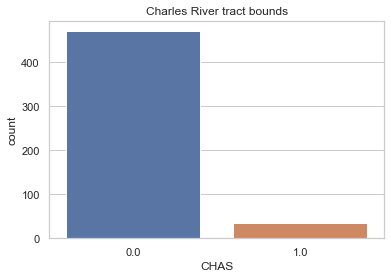

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x='CHAS', data=boston_df).set_title('Charles River tract bounds')

As expected, there is great majority of cases with no river bounds.

In [7]:
# AGE segmentation by [0, 35], (35, 70], and > 70
boston_df['age_group'] = pd.cut(boston_df.AGE, [0, 35, 70, 100], labels=['<=35', '(35, 70]', '>70'], right=False)

Text(0.5, 0, 'Age Group')

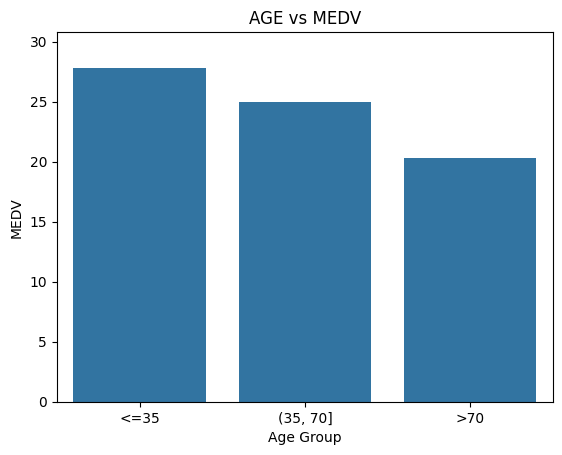

In [11]:
sns.barplot(x='age_group', y='MEDV', data=boston_df, errwidth=0).set_title('AGE vs MEDV')
pyplot.xlabel('Age Group')

The graph shows that house pricing tend to decreass as age increases.

Text(0.5, 1.0, 'NOX vs INDUS')

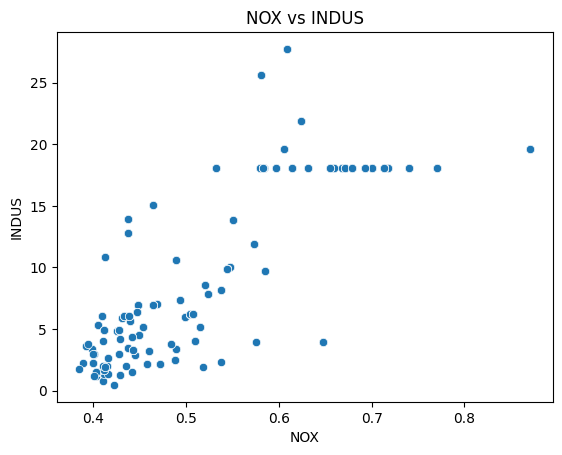

In [12]:
# relationship between NOX and INDUS
sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set_title('NOX vs INDUS')

The graph seems to suggest a correlation between the two variables, but their relationship is unclear.

Text(0.5, 1.0, 'PTRATIO')

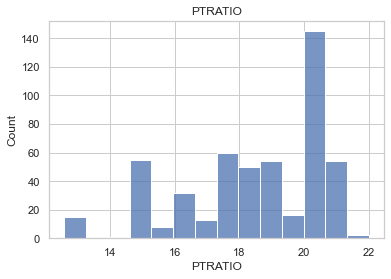

In [ ]:
# PTRATIO histogram
sns.histplot(boston_df['PTRATIO']).set_title('PTRATIO')

We can see that the most frequent values of PTRATIO occur around 20, and the tail of the distribution extends further to the right, indicating a right-skewed distribution.

## Variable relations

### 1. Relation between CHAS and MEDV

In the first instance, analyzing the dependency between the houses on the edge of the Charles River we have the following. To achieve this, wi will use a t-test, so we have to define if variances are iqual. So, we define

* $H_0:\sigma_1^2 = \sigma_2^2$  (variances are equal)
* $H_0:\sigma_1^2 \neq \sigma_2^2$  (variances are not equal)


In [ ]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')[1]

0.003238119367639829

Using Levene's test, we get a p-value = 0.003, so we discard that both variances are equal. Finally, we state
For this, we state the next hypothesis:

* $H_0: \mu_1 = \mu_2$ ("there is not significan difference in mean prices due to CHAS variable")
* $H_1: \mu_1 \neq \mu_2$ ("there is significan difference in mean prices due to CHAS variable")

and apply a t-test.

In [ ]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

Since p-value is less than 0.05, we can tell that there is a significant difference between means

### 2. Relaction between age and mdev

For this purpose, age will be binned by 5 equaly sized bins (with the same number of records in each bin), to later apply levene's test to check if their variance is the same. Aditionally to apply ANOVA test, we define the hypothesis

* $H_0:$ All bins have the same variance.
* $H_1:$ At least one bin has the different variance with respect to the others.


In [ ]:
# bins creatiom
boston_df['age_bins'] = pd.qcut(boston_df.AGE, 5)
grupos = []
for bin in boston_df['age_bins'].unique():
    grupos.append(boston_df[boston_df['age_bins'] == bin]['MEDV'])

# Levene test to bins
resultado = scipy.stats.levene(*grupos, center='mean')
print(resultado.pvalue)

0.3384819590439384


Given that the p-value is less than 0.05, we don't have information enough to reject that variances is equal. So, stating

* $H_0:$ All population means are equal
* $H_1:$ Not all population means are equal

we apply ANOVA in the following cell.

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(*grupos)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 21.436522548516507, P-Value: 2.4425886808194585e-16


Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### 3. Relation between nitric oxide concentrations and proportion of non-retail business acres per town

In order to apply a Pearson correlation test to NOX and INDUS, we have to state in a different way:
* $H_0:$ There is not correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
* $H_1:$ There is correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [ ]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209158, 7.913361061232845e-98)

Since p-value is less than 0.05, we can conclude that there is a relationship between the corresponding variables

### 4. Impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [ ]:
# linear regression between DIS and MEDV
modelo = ols('MEDV ~ DIS', data=boston_df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 28 May 2024   Prob (F-statistic):           1.21e-08
Time:                        20:50:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# coefficients and p-values
pd.DataFrame({
    'Variable': ['Intercept', 'DIS'],
    'Coefficient': modelo.params.values[0:2],
    'P-Value': modelo.pvalues.round(6).values[0:2]
})

,Variable,Coefficient,P-Value
0,Intercept,18.390088,0.0
1,DIS,1.091613,0.0


Since the **$\beta$** for DIS is 1.09, so is the slope of the line. That is to say, for every increase of DIS by a unit, MEDV will increase **1.09**.